# 주성분 분석

## PCA 클래스

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-03 04:26:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-03 04:26:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-03 04:26:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [46]:
fruits_2d.shape

(300, 10000)

In [47]:
print(pca.components_[:3])

[[ 9.24490195e-06  5.10601298e-06  8.91640398e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69701613e-05 -1.13551048e-05 -1.82152561e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.65220475e-05 -2.08401739e-05 -2.89870125e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [48]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

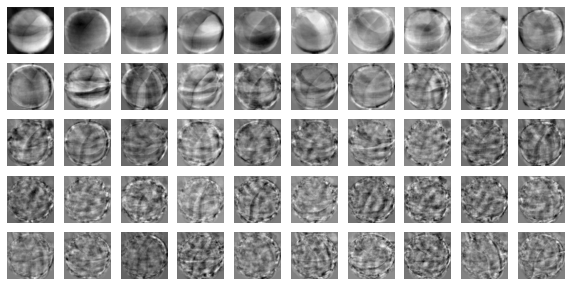

In [49]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [50]:
print(fruits_2d.shape)

(300, 10000)


In [51]:
fruits_pca = pca.transform(fruits_2d)

In [56]:
fruits_pca.shape

(300, 50)

In [53]:
print(fruits_pca[:3])

[[-2.77841779e+03 -1.57187381e+03 -1.33533774e+03 -1.54134681e+03
   3.01773969e+02  3.08058052e+02 -3.19610259e+02 -5.21959570e+02
  -1.42039325e+02 -1.40085356e+03  9.30922615e+02 -2.23881568e+02
   1.12431027e+02 -1.19302022e+01  8.42710715e+01  4.45504365e+02
   5.28749470e+02 -2.68806390e+02  1.53720975e+02 -1.92647669e+02
  -3.31518596e+01  4.69917515e+02  1.79368300e+02 -1.30370031e+02
   2.26716450e+02  6.85413114e+01 -5.00220536e+01 -1.01501203e+01
   6.69100272e+01 -1.83477015e+02 -4.58628794e+01 -1.67218665e+02
  -4.45424937e+01  4.62374244e+01 -9.86866118e+01  1.58878254e-01
  -9.35050575e+00 -1.37429076e+02  4.30117881e+01 -6.96607747e+01
   9.59499734e+01 -1.64572553e+02  3.25938823e+01 -3.13650945e+01
  -3.60758952e+01  5.39767928e+01  9.76480793e+01  2.50048580e+01
   9.14037503e+01 -3.94476184e+01]
 [-3.07827365e+03 -2.73927041e+03 -6.36183373e+02 -1.29571230e+02
  -1.11490826e+03  1.03140774e+03  5.18876658e+02  4.86934377e+01
   7.87878339e+02  5.04607122e+02 -3.6156

## 원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

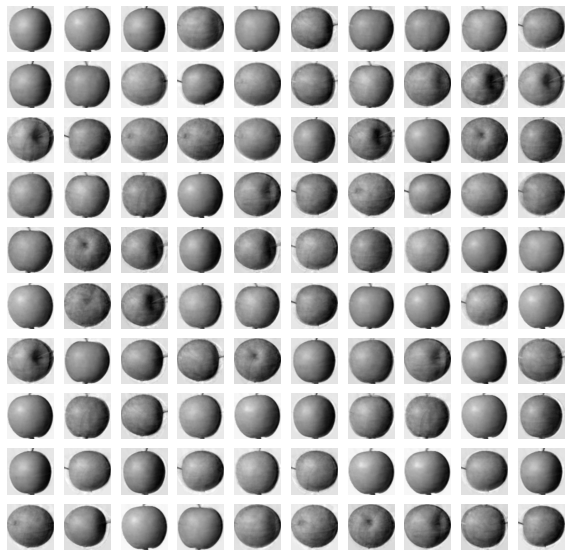

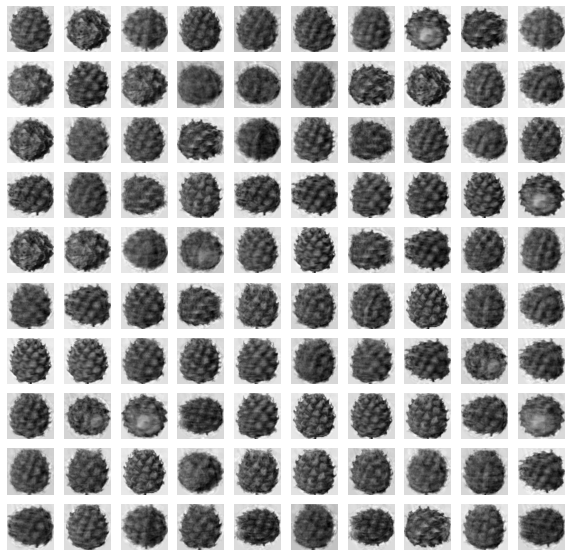

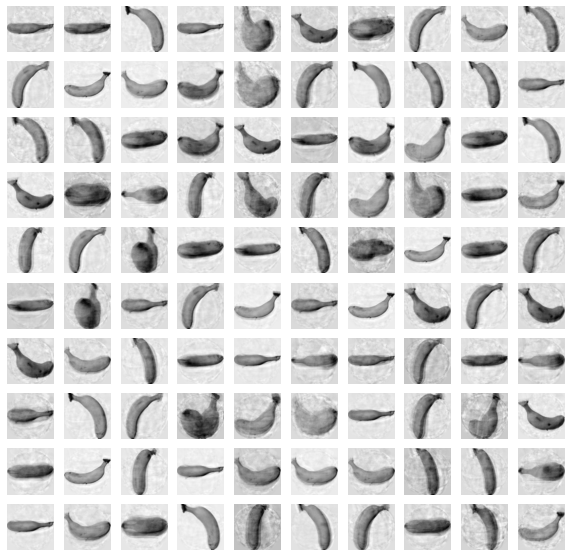

In [13]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [14]:
print(np.sum(pca.explained_variance_ratio_)) # 원래 데이터의 92%를 설명하고 있다.

0.9215499640290437


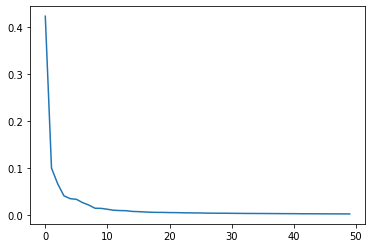

In [15]:
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 함께 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [18]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.468370532989502


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03099989891052246


In [20]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_)

2


In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04862112998962402


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [25]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


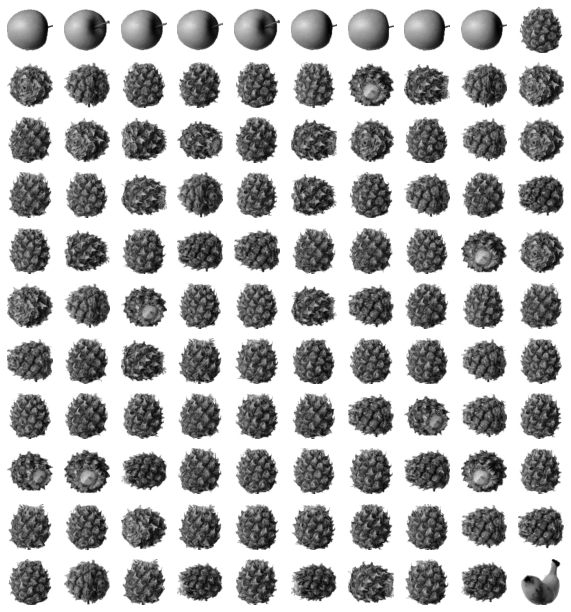

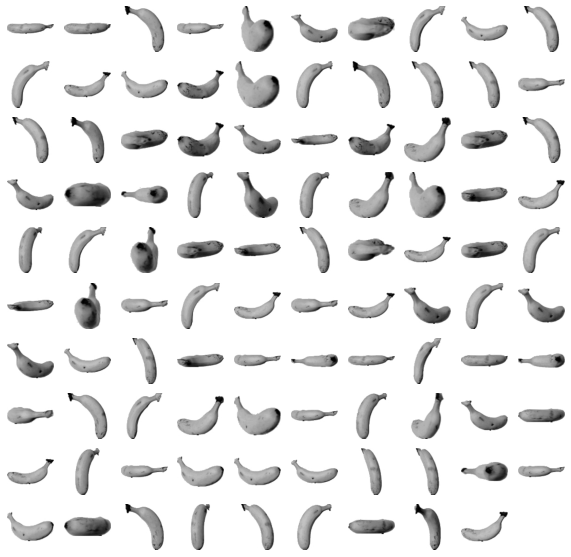

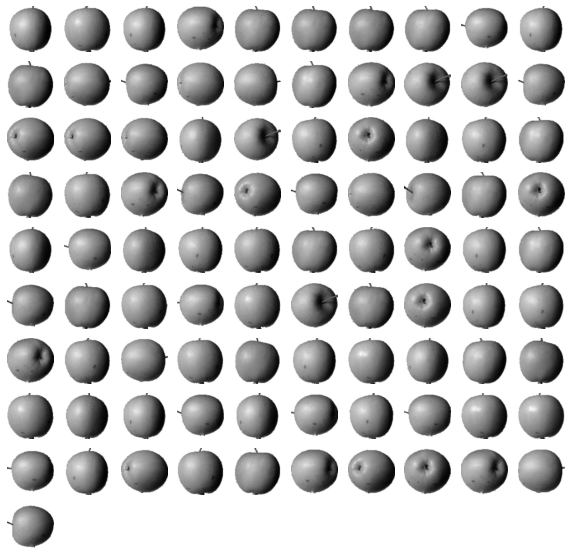

In [26]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

차원을 줄이면 시각화에도 도움이 된다.

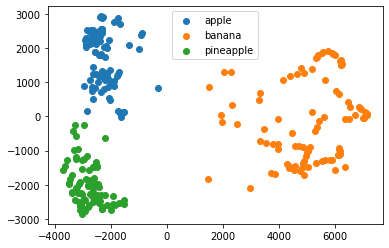

In [27]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

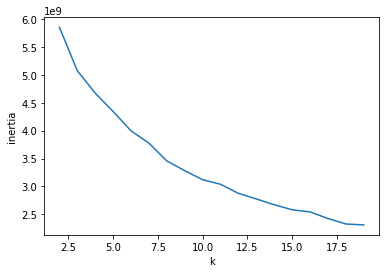

In [30]:
inertia = []
for k in range(2, 20):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 20), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()